# <center><font face=Times New Roman>Homework 1 <br/> <font color=grey  size=4>Qianran Ma | 7798937244 &ensp;&ensp;&ensp;&ensp; Yanan Zhou | 4366462176</font> </center>

## <font face=Times New Roman size=5>- Introduction -</font>
### <font face=Times New Roman>After reading the paper, the steps we took to complete this homework are as follows: 

<font face= Times New Roman size=4>(1) Data collection and cleaning <br/> (2) Model building <br/> (3) Solving the problem with population data of 2010 and 2020 <br/> (4) The "glide-path" property issue</font>

## (1) Data collection and cleaning

In the data preparation part, we summarize the data needed to build the model, which were the border data and the population data of 2010 and 2020（https://data.census.gov/）. The border data are used to form $a_{ij}$ in the formula; the population data are $pop^{2010}_i$ and $pop^{2020}_i$ in the objective function.

* For the border data, we collected the pairs of counties of Ohio which share a border, defined as ***df_a***, and then we design a function to work out the matrix $a_{ij}$.<br/>(The results we get in the following scripts are the set of index(0-87), so we need to add 1 for each to get the original county index(1-88))

In [1]:
import numpy as np
import pandas as pd
import cvxpy as cp

In [2]:
# set of county sharing the same border
df_a=pd.read_excel("aij.xlsx")
ls_a=df_a.values.tolist()
ls_a[:6]

[[0, 1], [0, 17], [0, 18], [1, 2], [1, 16], [1, 17]]

In [3]:
# define a function to judge 2 county whether share a border
def aij(i,j):
    if i==j:
        return 1
    elif i<j:
        if [i,j] in ls_a:
            return 1
        else:
            return 0
    else:
        if [j,i] in ls_a:
            return 1
        else:
            return 0

* For the population data, we collect the population data of 2010 and 2020 from Census website, respectively defined as “c10” and “c20”.

In [4]:
df_pop=pd.read_excel('pop.xlsx')
df_pop[:10]

,n,County_Name,POP_2010,POP_2020
0,1,WILLIAMS,38172,37102
1,2,DEFIANCE,39119,38286
2,3,PAULDING,19679,18806
3,4,VAN WERT,29029,28931
4,5,MERCER,40958,42528
5,6,DARKE,52945,51881
6,7,PREBLE,42502,40999
7,8,BUTLER,363465,390357
8,9,HAMILTON,802194,830639
9,10,CLERMONT,195312,208601


In [5]:
# number of variables
n=88

# population data of 2010
c10=np.array([0]*n)
c10=np.append(c10,df_pop.POP_2010.values)

In [6]:
# population data of 2020
c20=np.array([0]*n)
c20=np.append(c20,df_pop.POP_2020.values)

## (2) Model Building

In the model building part, we try to use Python to solve this mixed integer optimization problems. The package “cvxpy” is used. For the constraint set, we combine $x_{ij}$ and $y_{ij}$ as “X” and adjust the “A” of “AX$\geq$b”.

In [7]:
# A of the constraint set 
ls_aij=[]
for i in range(88):
    ls2=[]
    for j in range(88):
        ls2.append(aij(i,j))
    ls_aij.append(ls2)
ls_aij=np.hstack((ls_aij,(-1)*np.eye(88,dtype=int)))
a_=np.hstack((np.array([-1]*88),np.array([0]*88)))
ls_aij=np.vstack((ls_aij,a_))

We encapsulate the model in the implementation function with parameter c(population) and k(limit of principal places of business) to solve the optimization problem.

In [8]:
def implementation(c,k):
    # b
    b_=[0]*88
    b_.append(-k)
    b=np.array(b_)
    
    # model
    x=cp.Variable(n*2,integer=True)
    objective=cp.Maximize(cp.sum(c@x))
    constraints=[0<=x,x<=1,np.array(ls_aij)@x>=b]
    
    prob=cp.Problem(objective,constraints)
    result=prob.solve(solver=cp.CPLEX)
    return x

## (3) Solving the problem with population data of 2010 and 2020 

We plug in c and k to obtain the solution of Question1 and Question2.

### <font face=Times New Roman>- Question 1- <br/><font size =3> Using the 2011 data, solve the network location problem which is described in the paper by Jeff Camm.</font>

In [9]:
# Implementation - 1st year
x10=implementation(c10,5)
x10.value

array([-0., -0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  1.,  0.,  0.,
       -0., -0., -0.,  0.,  0., -0., -0.,  1., -0.,  0., -0., -0., -0.,
       -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0., -0.,
       -0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,
        0., -0.,  1., -0., -0.,  0.,  0.,  1., -0., -0., -0., -0., -0.,
        0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  1., -0.,  0.,  0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0.,  1.,  1.,  1.,  1.,  1., -0., -0., -0., -0.,
        1.,  1., -0.,  1.,  1.,  1., -0., -0., -0., -0.,  1.,  1., -0.,
       -0., -0., -0., -0., -0., -0., -0.,  1.,  1.,  1., -0., -0., -0.,
       -0.,  1.,  1., -0., -0., -0., -0., -0., -0., -0., -0.,  1.,  1.,
        1., -0.,  1., -0.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -0., -0.,
       -0., -0., -0., -0., -0.,  1.,  1.,  1.,  1.,  1.,  1., -0., -0.,
        1.,  1.,  1., -0., -0., -0., -0.])

In [10]:
x_index10=np.argwhere(x10.value==1)
x_index10[:5]

array([[10],
       [20],
       [54],
       [59],
       [74]])

In [11]:
# Implementation - 2nd year
x10_2=implementation(c10,10)
x10_2.value

array([-0., -0., -0.,  0., -0., -0., -0., -0., -0.,  1.,  0.,  1., -0.,
       -0.,  1., -0.,  0.,  0., -0., -0.,  1., -0.,  0., -0.,  0.,  0.,
       -0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,
       -0.,  0.,  0.,  0., -0.,  1., -0., -0., -0.,  0., -0.,  1., -0.,
        0., -0.,  0., -0., -0.,  0.,  1.,  0., -0.,  0., -0., -0., -0.,
        0., -0.,  0., -0., -0., -0.,  0.,  1., -0.,  0., -0., -0.,  1.,
       -0., -0.,  0.,  0.,  1., -0., -0., -0., -0., -0., -0., -0., -0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -0.,  1.,  1.,  1.,  1.,  1., -0.,  1.,  1.,  1.,  1.,
       -0., -0., -0.,  1.,  1., -0., -0.,  1.,  1.,  1.,  0.,  1., -0.,
       -0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -0., -0., -0.,
       -0.,  1., -0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -0.])

In [12]:
x_index10_2=np.argwhere(x10_2.value==1)
x_index10_2[:10]

array([[ 9],
       [11],
       [14],
       [20],
       [44],
       [50],
       [58],
       [72],
       [77],
       [82]])

In [13]:
# Implementation - 3rd year
x10_3=implementation(c10,15)
x10_3.value

array([-0.,  0., -0.,  1., -0.,  0., -0.,  1., -0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  1., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1., -0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
       -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [14]:
x_index10_3=np.argwhere(x10_3.value==1)
x_index10_3[:15]

array([[ 3],
       [ 7],
       [13],
       [17],
       [28],
       [32],
       [34],
       [37],
       [50],
       [54],
       [58],
       [67],
       [74],
       [77],
       [86]])

<font color=red>**Conclusion:**<br/>
When k=5, the solution is (11, 21, 55, 60, 75);<br/>
when k=10, the solution is (10, 12, 15, 21, 45, 51, 59, 73, 78, 83);<br/>
when k=15, the solution is (4, 8, 14, 18, 29, 33, 35, 38, 51, 55, 59, 68, 75, 78, 87).

### <font face=Times New Roman>- Question 2- <br/><font size =3> Using the 2020 data, repeat the same exercise as above.</font>

In [15]:
# Implementation - 1st year
x20=implementation(c20,5)
x20.value

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  1.,  0.,  0.,
        0.,  0., -0.,  0.,  0., -0., -0.,  1.,  0.,  0., -0.,  0., -0.,
       -0.,  0.,  0.,  0., -0., -0.,  0., -0., -0., -0., -0., -0.,  0.,
       -0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,
       -0.,  0.,  1., -0., -0., -0.,  0.,  1., -0.,  0., -0., -0., -0.,
        0., -0., -0., -0., -0., -0., -0.,  0., -0.,  1.,  0., -0.,  0.,
       -0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0.,  1.,  1.,  1.,  1.,  1., -0., -0., -0., -0.,
        1.,  1., -0.,  1.,  1.,  1., -0., -0., -0., -0.,  1.,  1., -0.,
       -0., -0., -0., -0., -0., -0., -0.,  1.,  1.,  1., -0., -0., -0.,
       -0.,  1.,  1., -0., -0., -0., -0., -0., -0., -0., -0.,  1.,  1.,
        1., -0.,  1., -0.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -0., -0.,
       -0., -0., -0., -0., -0.,  1.,  1.,  1.,  1.,  1.,  1., -0., -0.,
        1.,  1.,  1., -0., -0., -0., -0.])

In [16]:
x_index20=np.argwhere(x20.value==1)
x_index20[:5]

array([[10],
       [20],
       [54],
       [59],
       [74]])

In [17]:
# Implementation - 2nd year
x20_2=implementation(c20,10)
x20_2.value

array([-0., -0., -0.,  0., -0., -0., -0.,  0., -0.,  1.,  0.,  1., -0.,
        0.,  1., -0.,  0.,  0., -0., -0.,  1., -0.,  0., -0.,  0., -0.,
       -0., -0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,
       -0.,  0.,  0.,  0.,  0.,  1., -0.,  0., -0., -0., -0.,  1., -0.,
        0., -0.,  0., -0., -0.,  0.,  1.,  0., -0., -0., -0., -0., -0.,
        0., -0., -0., -0., -0., -0., -0.,  1., -0.,  0., -0., -0.,  1.,
       -0., -0.,  0.,  0.,  1.,  0.,  0.,  0., -0., -0., -0., -0., -0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -0.,  1.,  1.,  1.,  1.,  1., -0.,  1.,  1.,  1.,  1.,
       -0., -0., -0.,  1.,  1., -0., -0.,  1.,  1.,  1.,  0.,  1., -0.,
       -0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -0., -0., -0.,
       -0.,  1., -0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -0.])

In [18]:
x_index20_2=np.argwhere(x20_2.value==1)
x_index20_2[:10]

array([[ 9],
       [11],
       [14],
       [20],
       [44],
       [50],
       [58],
       [72],
       [77],
       [82]])

In [19]:
# Implementation - 3rd year
x20_3=implementation(c20,15)
x20_3.value

array([-0.,  0., -0.,  1., -0.,  0., -0.,  1., -0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  1., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1., -0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
       -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [20]:
x_index20_3=np.argwhere(x20_3.value==1)
x_index20_3[:15]

array([[ 3],
       [ 7],
       [13],
       [17],
       [28],
       [32],
       [34],
       [37],
       [50],
       [54],
       [58],
       [67],
       [74],
       [77],
       [86]])

<font color=red>**Conclusion:**<br/>
When k=5, the solution is (11, 21, 55, 60, 75);<br/>
when k=10, the solution is (10, 12, 15, 21, 45, 51, 59, 73, 78, 83);<br/>
when k=15, the solution is (4, 8, 14, 18, 29, 33, 35, 38, 51, 55, 59, 68, 75, 78, 87).

## (4) The "glide-path" property issue

### <font face=Times New Roman>- Question 3- <br/><font size =3> Verify whether the solution from 2011 satisfies the “glide-path” property described in the paper.</font>

<font color=red> ***The glide path of 2010 itself:***

From the conclusion of Question 1, we can see that when k=10, the solution set (10, 12, 15, 21, 45, 51, 59, 73, 78, 83) does not conclude the solution set (11, 21, 55, 60, 75) when k=5, and when k=15, the solution set (4, 8, 14, 18, 29, 33, 35, 38, 51, 55, 59, 68, 75, 78, 87) does not conclude the solution set when k=10.

<font color=red>**Conclusion:** <br/>
 the three-year implementation plan of 2011 does not satisfies the "glide-path" property.   

<font color=red>***The glide path of 2010-2020:*** <br/>

Taking 2020's data into consideration, we are dedicated to find out the k pairs that make the implementation plans using 2011's data and 2020's data satisfy the "glide path" to get a more general conclusion. Our thread is as follows:<br/>
1. Work out the solutions respectively using 2010's and 2020's population data when k differs from 1 to 15 to get ***l10*** and ***l20***.
2. Compare the solutions of 2010 and 2020 when $k^{2020}$ $\geq$ $k^{2010}$ to conclude the k pairs that make the solution satisfy the "glide-path".

In [21]:
# the solution for 2010 population data when k_2010 differs from 1 to 15
l10=[]
for i in range(1,16):
    x10=implementation(c10,i)
    x_index=pd.DataFrame(np.argwhere(x10.value==1))
    x_index.rename(columns={0:"county"},inplace=True)
    x=x_index[x_index.county<88].values.reshape(1,-1)[0].tolist()
    l10.append(x)
l10

[[76],
 [10, 76],
 [10, 54, 76],
 [10, 54, 59, 74],
 [10, 20, 54, 59, 74],
 [10, 17, 40, 54, 74, 77],
 [10, 17, 24, 40, 54, 74, 77],
 [10, 17, 24, 40, 50, 54, 74, 77],
 [10, 14, 17, 24, 40, 50, 54, 74, 77],
 [9, 11, 14, 20, 44, 50, 58, 72, 77, 82],
 [9, 11, 14, 20, 44, 50, 58, 67, 72, 77, 82],
 [9, 11, 14, 17, 40, 44, 50, 58, 67, 72, 77, 82],
 [9, 11, 14, 17, 34, 37, 44, 50, 58, 67, 72, 77, 82],
 [7, 12, 14, 17, 27, 37, 44, 50, 58, 67, 72, 77, 82],
 [3, 7, 13, 17, 28, 32, 34, 37, 50, 54, 58, 67, 74, 77, 86]]

In [22]:
# the solution for 2020 population data when k_2020 differs from 1 to 15
l20=[]
for i in range(1,16):
    x20=implementation(c20,i)
    x_index=pd.DataFrame(np.argwhere(x20.value==1))
    x_index.rename(columns={0:"county"},inplace=True)
    x=x_index[x_index.county<88].values.reshape(1,-1)[0].tolist()
    l20.append(x)
l20

[[76],
 [10, 76],
 [10, 54, 76],
 [10, 54, 59, 74],
 [10, 20, 54, 59, 74],
 [10, 17, 40, 54, 74, 77],
 [10, 17, 24, 40, 54, 74, 77],
 [10, 17, 24, 40, 50, 54, 74, 77],
 [10, 14, 17, 24, 40, 50, 54, 74, 77],
 [9, 11, 14, 20, 44, 50, 58, 72, 77, 82],
 [9, 11, 14, 20, 44, 50, 58, 67, 72, 77, 82],
 [9, 11, 14, 17, 44, 50, 58, 67, 72, 77, 82],
 [9, 11, 14, 17, 38, 41, 44, 50, 58, 67, 72, 77, 82],
 [7, 14, 17, 24, 27, 34, 37, 44, 50, 58, 67, 72, 77, 82],
 [3, 7, 13, 17, 28, 32, 34, 37, 50, 54, 58, 67, 74, 77, 86]]

We make a dataframe "glide_path" to display whether the principal places built in 2010 are included in those built in 2020 when $k^{2020}$ $\geq$ $k^{2010}$. If so, the value in the dataframe is 1, otherwise is 0.

In [23]:
# the columns are k_2020, the rows are k_2010
glide_path=pd.DataFrame([[2]*15]*15)
for i in range(15):
    x10_=l10[i]
    for j in range(i,15):
        x20_=l20[j]
        TF=set(x20_)>=set(x10_)
        if TF is True:
            glide_path.loc[i,j]=1
        else:
            glide_path.loc[i,j]=0
glide_path

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0
4,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0
5,2,2,2,2,2,1,1,1,1,0,0,0,0,0,0
6,2,2,2,2,2,2,1,1,1,0,0,0,0,0,0
7,2,2,2,2,2,2,2,1,1,0,0,0,0,0,0
8,2,2,2,2,2,2,2,2,1,0,0,0,0,0,0
9,2,2,2,2,2,2,2,2,2,1,1,0,0,0,0


We group the dataframe by $k^{2010}$ to clearly see the set of $k^{2020}$ that meet the requirement of "glide path".

In [24]:
l_index=[]
for i in range(15):
    for j in range(15):
        if glide_path.loc[i,j]==1:
            l_index.append([i,j])
df_index=pd.DataFrame(l_index)
df_index.rename(columns={0:'2010',1:'2020'},inplace=True)
df_index[:]+=1
df_index.groupby('2010',as_index=False).agg(list)

,2010,2020
0,1,"[1, 2, 3]"
1,2,"[2, 3]"
2,3,[3]
3,4,"[4, 5]"
4,5,[5]
5,6,"[6, 7, 8, 9]"
6,7,"[7, 8, 9]"
7,8,"[8, 9]"
8,9,[9]
9,10,"[10, 11]"


<font color=red>**Conclusion:**  
    With the pairs of ($k^{2010}$,$k^{2020}$) above, the solution from 2011 satisfies the “glide-path” property described in the paper. Otherwise, it does not satisfy.

### <font face=Times New Roman>- Question 4- <br/><font size =3> Assuming that you knew the 2020 data in 2011, setup a mathematical model (no need to solve it) to ensure the glide-path property would be satisfied for the 2011 solution (in 2020).</font>

Calculate the weight of $ pop^{2010}_i $$y^{2010}_i$ and $ pop^{2020}_i $$y^{2020}_i$ in the objective function using the ratio of these two years' population 

In [25]:
w2010=sum(c10)/(sum(c10)+sum(c20))
w2010

0.49384397542557595

In [26]:
w2020=sum(c20)/(sum(c10)+sum(c20))
w2020

0.5061560245744241

<font color=red>**Conclusion:**
* Let $x^{2010}_j$=1 and $x^{2020}_j$=1 if we place a principal place of business location in county j in 2010 or 2020 and 0 if not; j=1,2,...,88.<br/>
* Let $y^{2010}_i$=1 and $y^{2020}_i$=1 if county i is covered in 2010 or 2020 and 0 if not; i=1,2,...,88.<br/>
* Let $a_{ij}$=1 if county i and county j share a border and 0 if not ($a_{ii}$=1). <br/>
* Define $pop^{2010}_i$ and $pop^{2020}_i$ to be the population of county i in 2010 or 2020.<br/>
* Define $k^{2010}$ and $k^{2020}$ to be the number of principal places of business we want to build in 2010 or 2020.<br/>
<br/>
The model is as follows:

In [27]:
from IPython.display import Image

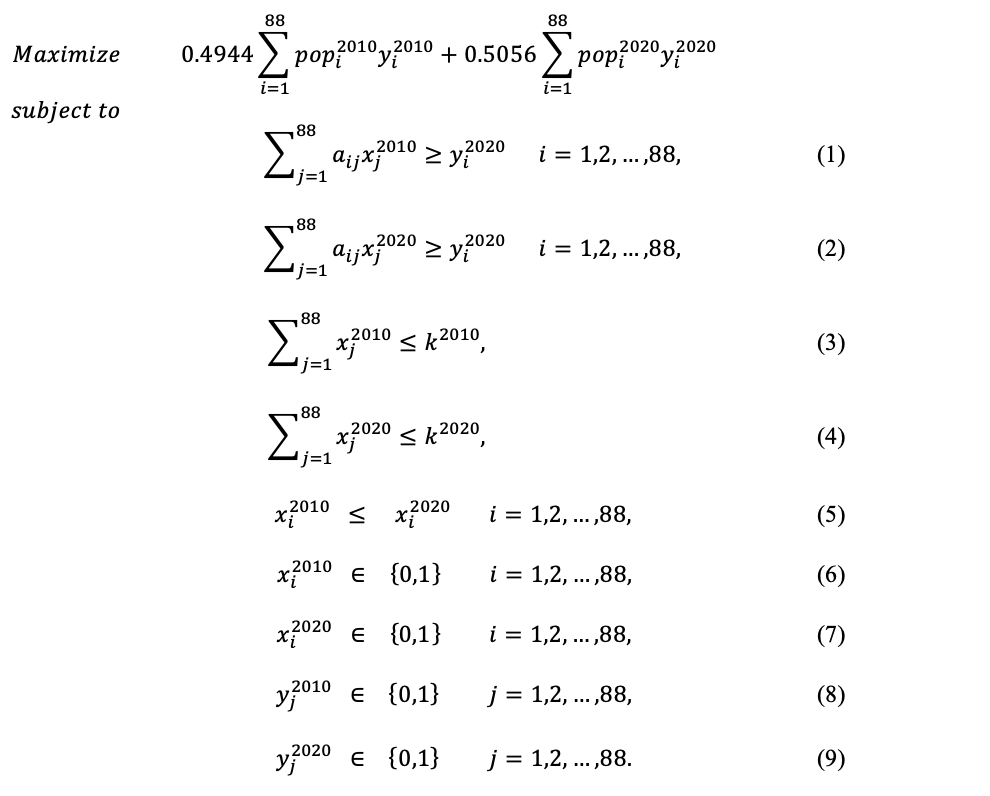

In [28]:
Image("fun1.png",width=600,height=1200)

<font color=red>The objective function maximize the weighted population reached in 2010 and 2020. <br/>
The constraint set (1)&(2) ensure that a county i is covered only if it or an adjacent county is selected as a principal place of business. <br/>
Constraint set (3)&(4) ensure that no more than $k^{2010}$ and $k^{2010}$ principal places of business are selected in 2010 and 2020. 

<font color=grey>
Reference:<br/>
[1] Jeffrey D. Camm. How to Influence and Improve Decisions Through Optimization Models. In INFORMS TutORials in Operations Research. Published online: 19 Oct 2018; 1-19.
